In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import scan, simulate_data

In [3]:
filename = '2023-11-05_hc2_ac3_fcx1.pickle'

In [4]:
with open(filename, 'rb') as handle:
    master_dict = pickle.load(handle)
    

In [6]:
master_dict

{'hc2': {'ec013.527': {0: {'raster': (array([   3150,    3957,    5109, ..., 1058318, 1058344, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12])),
    'surrogate': (array([   3150,    3955,    5107, ..., 1058320, 1058342, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12]))},
   1: {'raster': (array([      7,      53,      76, ..., 1059719, 1059734, 1059969]),
     array([ 6,  4,  4, ...,  4, 10,  4])),
    'surrogate': (array([      5,      55,      75, ..., 1059718, 1059735, 1059970]),
     array([ 6,  4,  4, ...,  4, 10,  4]))},
   2: {'raster': (array([      2,      25,      53, ..., 1059919, 1059937, 1059985]),
     array([5, 5, 4, ..., 5, 5, 5])),
    'surrogate': (array([      2,      24,      51, ..., 1059920, 1059937, 1059986]),
     array([5, 5, 4, ..., 5, 5, 5]))},
   3: {'raster': (array([   3953,    5431,    7545, ..., 1059634, 1059901, 1060090]),
     array([4, 3, 5, ..., 4, 4, 4])),
    'surrogate': (array([   3955,    5431,    7547, ..., 1059635, 1059903, 1060089]),

In [7]:
def sparse_convolution(spikes,labels, pattern_):
    # Extract unique channels from the pattern
    pattern = pattern_.copy()
    filt_labels = pattern.T[1]
    filt_spikes = spikes[np.isin(labels, filt_labels)]
    filt_labels = labels[np.isin(labels, filt_labels)]
    set_raster = set([(a,b) for a,b in zip(filt_spikes,filt_labels)])
    out = np.zeros((1+np.max(spikes)))
    t=0
    while t <= (np.max(spikes)):
        pattern.T[0]+=1
        set_pattern = set([tuple(k) for k in pattern])
        out[t] = len(set_pattern.intersection(set_raster))/len(set_pattern)
        t+=1
                
    return out



In [25]:
def apply_function_to_dict(d, func, filename):
    result_dict = {}
    keys = list(d.keys())  # Get a list of keys to track progress
    for key in tqdm(keys, desc='Processing', ncols=100):
        value = d[key]
        if isinstance(value, dict):
            result_dict[key] = apply_function_to_dict(value, func,filename)
        else:
            result_dict[key] = func(*value)
# 
        with open(filename, 'wb') as file:
            pickle.dump(result_dict, file)
    return result_dict

# Function to apply to each 'raster' and 'surrogate'
def your_function(spikes,labels):
    pattern_template, all_times, window_time, cluster_time, sequence_time = scan.scan_raster(spikes,labels)
    convolution = []
    for k in tqdm(pattern_template):
        convolution.append(sparse_convolution(spikes,labels, k))
    convolution = np.array(convolution).T
    
    return pattern_template, convolution , window_time, cluster_time, sequence_time

filename = 'hc2_ac3_fcx1_results.pickle'

# Apply your function to the original dictionary
result_dict = apply_function_to_dict(master_dict, your_function,'test1.pickle')

# Print the resulting dictionary
print(result_dict)


Processing:   0%|                                                             | 0/1 [00:00<?, ?it/s]

Processing:   0%|                                                             | 0/4 [00:00<?, ?it/s]


Processing:   0%|                                                             | 0/2 [00:00<?, ?it/s]

2833 Windows


38 patterns found...... 97% 10.01 | opt_cutoff - 0.01 | most_detections - 51tections - 5111






  0%|                                                                                           | 0/38 [00:00<?, ?it/s]



  3%|██▏                                                                                | 1/38 [00:15<09:38, 15.64s/it]



  5%|████▎                                                                              | 2/38 [00:31<09:35, 15.98s/it]



  8%|██████▌                                                                            | 3/38 [00:48<09:23, 16.09s/it]



 11%|████████▋                                                                          | 4/38 [01:04<09:08, 16.14s/it]



 13%|██████████▉                                                                        | 5/38 [01:20<08:48, 16.02s/it]



 16%|█████████████                                                                      | 6/38 [01:36<08:39, 16.23s/it]



 18%|███████████████▎                                                                   | 7/38 [01:52<08:16, 16.00s/it]



 21%|███████

2824 Windows


42 patterns found...... 98% 10.01 | opt_cutoff - 0.01 | most_detections - 23tections - 2333






  0%|                                                                                           | 0/42 [00:00<?, ?it/s]



  2%|█▉                                                                                 | 1/42 [00:15<10:41, 15.63s/it]



  5%|███▉                                                                               | 2/42 [00:31<10:28, 15.72s/it]



  7%|█████▉                                                                             | 3/42 [00:47<10:10, 15.66s/it]



 10%|███████▉                                                                           | 4/42 [01:02<09:55, 15.67s/it]



 12%|█████████▉                                                                         | 5/42 [01:18<09:38, 15.63s/it]



 14%|███████████▊                                                                       | 6/42 [01:34<09:31, 15.88s/it]



 17%|█████████████▊                                                                     | 7/42 [01:49<09:08, 15.68s/it]



 19%|███████

KeyboardInterrupt: 

In [21]:
with open('test1.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [52]:
flat_master_dict.pop('1.1.surrogate')

(array([   309,    397,    431, ..., 621063, 621085, 621087]),
 array([ 1,  1,  9, ..., 13,  6,  8]))

In [53]:
flat_master_dict.keys()

dict_keys(['1.2.raster', '1.2.surrogate'])

In [57]:
master_dict

{'ac3': {1: {1: {'raster': (array([   311,    398,    431, ..., 621061, 621086, 621086]),
     array([ 1,  1,  9, ..., 13,  6,  8])),
    'surrogate': (array([   309,    397,    431, ..., 621063, 621085, 621087]),
     array([ 1,  1,  9, ..., 13,  6,  8]))},
   2: {'raster': (array([    32,     32,     32, ..., 621124, 621139, 621139]),
     array([30, 27, 21, ..., 17, 27, 22])),
    'surrogate': (array([    32,     32,     30, ..., 621122, 621138, 621140]),
     array([30, 27, 21, ..., 17, 27, 22]))}}},
 'fcx1': {'Dino_061914': {0: {0: {'raster': (array([   0,    0,    1, ..., 3508, 3508, 3508]),
      array([3, 3, 6, ..., 9, 4, 8])),
     'surrogate': (array([   0,   -2,    0, ..., 3506, 3507, 3510]),
      array([3, 3, 6, ..., 9, 4, 8]))},
    1: {'raster': (array([   0,    1,    1, ..., 3508, 3508, 3508]),
      array([20, 18, 15, ..., 23, 15, 22])),
     'surrogate': (array([   2,    1,    0, ..., 3508, 3510, 3506]),
      array([20, 18, 15, ..., 23, 15, 22]))},
    2: {'raster': 

In [54]:
# Function to apply to each 'raster' and 'surrogate'
def your_function(spikes,labels):
    pattern_template, all_times, window_time, cluster_time, sequence_time = scan.scan_raster(spikes,labels,window_dim=50)
    convolution = []
    for k in tqdm(pattern_template):
        convolution.append(sparse_convolution(spikes,labels, k))
    convolution = np.array(convolution).T
    
    return pattern_template, convolution , window_time, cluster_time, sequence_time

def flatten_dict(d, parent_key='', sep='.'):
    items = {}
    for key, value in d.items():
        new_key = f"{parent_key}{sep}{key}" if parent_key else key
        if isinstance(value, dict):
            items.update(flatten_dict(value, new_key, sep=sep))
        else:
            items[new_key] = value
    return items

# Flatten the initial dictionary into a flat structure
flat_master_dict = flatten_dict(master_dict['ac3'])

# Initialize the result_dict with an empty dictionary
result_dict = {}

# Create a progress bar
pbar = tqdm(total=len(flat_master_dict), desc='Processing', ncols=100)

filename = 'ac3_results2.pickle'

for key, value in flat_master_dict.items():
    result_dict[key] = your_function(*value)
    # Save the resulting dictionary as a pickle file
    with open(filename, 'wb') as file:
        pickle.dump(result_dict, file)
    pbar.update(1)  # Update the progress bar for each processed key

# Close the progress bar
pbar.close()

# Reconstruct the resulting dictionary with the original structure
def reconstruct_dict(flat_dict):
    result_dict = {}
    for key, value in flat_dict.items():
        keys = key.split('.')
        current_dict = result_dict
        for k in keys[:-1]:
            current_dict = current_dict.setdefault(k, {})
        current_dict[keys[-1]] = value
    return result_dict

result_dict = reconstruct_dict(result_dict)

# Print the final resulting dictionary
print(result_dict)


Processing:  25%|███████████▎                                 | 1/4 [6:26:40<19:20:00, 23200.33s/it]


32356 Windows


30 patterns found...... 97% 10.01 | opt_cutoff - 5.6899999999999995 | most_detections - 30tections - 30



Processing:  25%|███████████▊                                   | 1/4 [2:46:14<8:18:42, 9974.03s/it]

32185 Windows


117 patterns found..... 99% 10.01 | opt_cutoff - 4.12 | most_detections - 10tections - 10etections - 6



 56%|█████████████████████████████████████████████                                    | 65/117 [16:56<13:02, 15.04s/it]


Processing:  50%|███████████████████████                       | 2/4 [5:51:51<5:55:16, 10658.24s/it]

39720 Windows


KeyboardInterrupt: 

In [ ]:
'''
opt_cutoff 1
'''

In [60]:
pattern_template, convolution , window_time, cluster_time, sequence_time = result_dict['1.1.raster']

In [63]:
counts = np.array([list(np.where(convolution==1)[1]).count(k) for k in np.unique(np.where(convolution==1)[1])])
patterns = np.unique(np.where(convolution==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>=3]), np.array(counts[counts>=3]), np.array([len(k) for k in pattern_template[patterns[counts>=3]]])

(array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64),
 array([111, 183, 145, 111, 104, 268, 274, 162,  85,  75,  70,  78,  93,
        192, 129, 108, 463, 463, 108,  95, 241, 119, 241, 201, 127, 127,
         94,  73]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]))

In [65]:
with open('ac3_results.pickle', 'rb') as handle:
    debug = pickle.load(handle)

In [71]:
pattern_template_, convolution_ , _,_,_ =  debug['1.1.surrogate']

In [72]:
counts = np.array([list(np.where(convolution_==1)[1]).count(k) for k in np.unique(np.where(convolution_==1)[1])])
patterns = np.unique(np.where(convolution_==1)[1])
pattern_template_ = np.array(pattern_template_,dtype='object')
np.array(patterns[counts>=3]), np.array(counts[counts>=3]), np.array([len(k) for k in pattern_template_[patterns[counts>=3]]])

(array([  0,   1,   2,   3,   4,   5,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         44,  46,  49,  51,  52,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  92,  93,  94,  95,  96,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116], dtype=int64),
 array([111, 111,  65,  60,  58,  36,   3,   3,  65, 130,  74,  69,  76,
        111, 112, 115, 111,  69,  93,  36, 106,  68, 142, 104,  90,  85,
         70,  66,  69,  52,  40,  57,  60, 131,  73, 119,   5, 118,   4,
          5,   3,   3,   6,   4, 118, 112,  85,  72,  59,  66,   3, 104,
          5, 131, 142,  91, 142,  77,  71,  72,  77,  49,  83, 113,  84,
        112,  53,  53, 

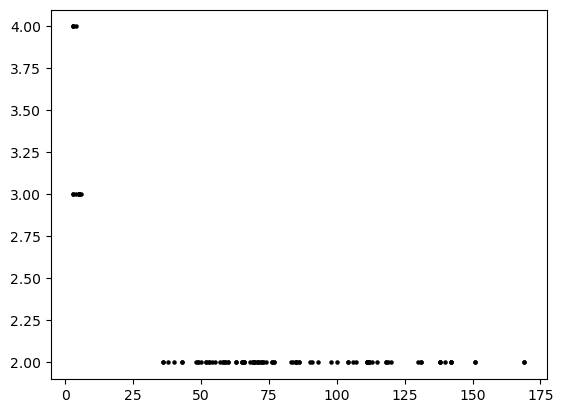

In [74]:
plt.figure()
plt.scatter(np.array(counts[counts>=3]),np.array([len(k) for k in pattern_template_[patterns[counts>=3]]]),c='black',s=5)
plt.show()

In [27]:
master_dict

{'hc2': {'ec013.527': {0: {'raster': (array([   3150,    3957,    5109, ..., 1058318, 1058344, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12])),
    'surrogate': (array([   3150,    3955,    5107, ..., 1058320, 1058342, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12]))},
   1: {'raster': (array([      7,      53,      76, ..., 1059719, 1059734, 1059969]),
     array([ 6,  4,  4, ...,  4, 10,  4])),
    'surrogate': (array([      5,      55,      75, ..., 1059718, 1059735, 1059970]),
     array([ 6,  4,  4, ...,  4, 10,  4]))},
   2: {'raster': (array([      2,      25,      53, ..., 1059919, 1059937, 1059985]),
     array([5, 5, 4, ..., 5, 5, 5])),
    'surrogate': (array([      2,      24,      51, ..., 1059920, 1059937, 1059986]),
     array([5, 5, 4, ..., 5, 5, 5]))},
   3: {'raster': (array([   3953,    5431,    7545, ..., 1059634, 1059901, 1060090]),
     array([4, 3, 5, ..., 4, 4, 4])),
    'surrogate': (array([   3955,    5431,    7547, ..., 1059635, 1059903, 1060089]),